In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 2
We want to consider the map $x_{t+1} = f(x_t, w, \theta) = w * \sigma (x_t) + \theta$ where $\sigma (x) = \frac{1}{1+e^{-x}}$. <br>
For this we will first define a function generating such a map:

In [2]:
def generate_f(start, w = 7, theta = -2.5, N = 200):
    sigma = lambda x: 1 / (1 + np.exp(-x))
    
    out = np.zeros(N)
    out[0] = start
    
    for i in range(1, N):
        out[i] = w * sigma(out[i-1]) + theta
        
    return out

### Task 2.1
We can now examine this for fixed points at $w = 7\ ;\ \theta = -2.5$

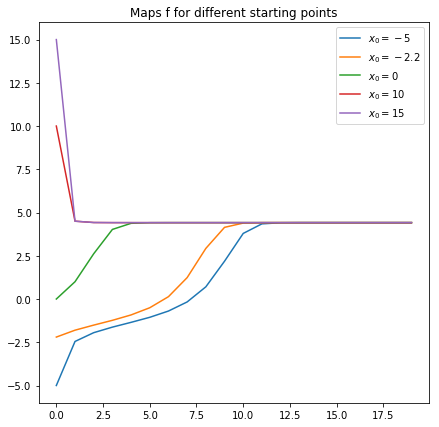

In [3]:
plt.figure(figsize = (7,7))
plt.title('Maps f for different starting points')

for x_0 in [-5, -2.2, 0, 10, 15]:
    f_map = generate_f(x_0, N = 20)
    plt.plot(f_map, label = f'$x_0 = {x_0}$')

plt.legend()

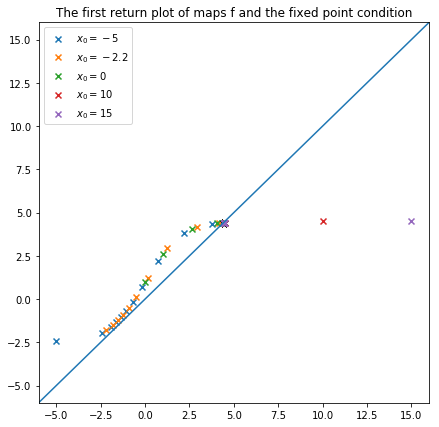

In [4]:
plt.figure(figsize = (7,7))
plt.title('The first return plot of maps f and the fixed point condition')

for x_0 in [-5, -2.2, 0, 10, 15]:
    f_map = generate_f(x_0)
    plt.scatter(f_map[:-1], f_map[1:], marker='x', label = f'$x_0 = {x_0}$')

plt.plot(np.linspace(-1000, 1000, 10), np.linspace(-1000, 1000, 10))

plt.xlim(-6, 16)
plt.ylim(-6, 16)

plt.legend()

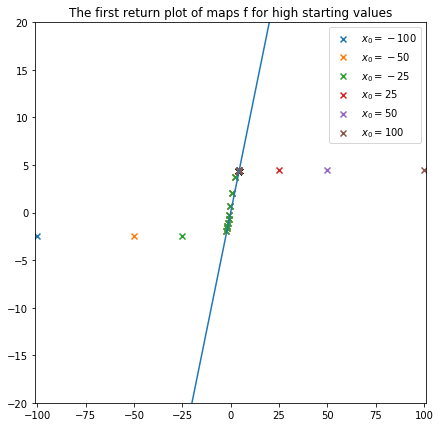

In [5]:
plt.figure(figsize = (7,7))
plt.title('The first return plot of maps f for high starting values')

for x_0 in [-100, -50 , -25, 25, 50, 100]:
    f_map = generate_f(x_0)
    plt.scatter(f_map[:-1], f_map[1:], marker='x', label = f'$x_0 = {x_0}$')

plt.plot(np.linspace(-1000, 1000, 10), np.linspace(-1000, 1000, 10))

plt.xlim(-101, 101)
plt.ylim(-20, 20)

plt.legend()

In [6]:
generate_f(0, N = 10000)[-1]

4.4164713534850275

We can see that this map has one fixed point at ~4.42, other fixed points could not be found. <br>
This fixed point is stable since maps converge towards it for all starting values. <br>
There may be other fixed points but the limited calculation power of this device restricts starting values to $|x_0| < 1000$. This means that we can not examine the dynamical behavior of this map everywhere. <br>
There also is a piece of the map that is roughly parallel to the fixed point condition (at ~-1.25), but since it does not appear to touch it, it is not a fixed point.

### Task 2.2
Next we want to create the bifurcation plot of the map for different values of theta.

In [7]:
thetas = np.linspace(-10, 0, 1000)

In [8]:
def generate_bifurcation(x_0):
    fig, axs = plt.subplots(2,1, figsize = (7,10))

    limit = []

    for theta in thetas:
        map_f = generate_f(-5, 7, theta, 150)
        limit.append(map_f[-1])
        axs[0].plot(map_f)

    axs[0].set_title(r'The map $f(x_0 = {}, w = 7, \theta \in [-10, 0])$'.format(x_0))
    axs[0].set_xlabel('t')
    
    axs[1].scatter(thetas, limit, marker='.')
    axs[1].set_title(r'The bifurcation plot for the map $f(x_0 = {}, w = 7, \theta \in [-10, 0])$'.format(x_0))
    axs[1].set_xlabel(r'$\theta$')
    axs[1].set_ylabel(r'fixed points $x_{t \rightarrow \infty}$')

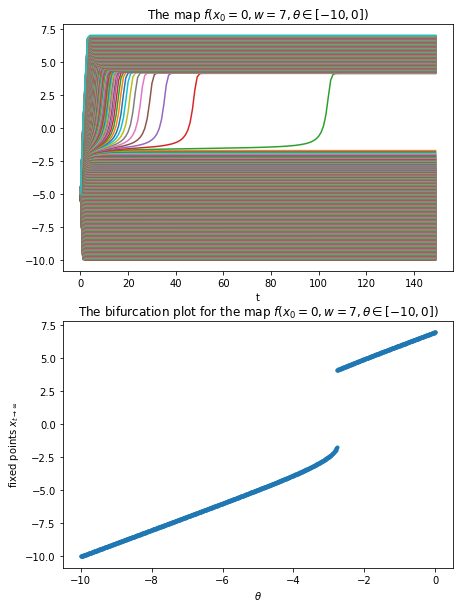

In [9]:
generate_bifurcation(0)

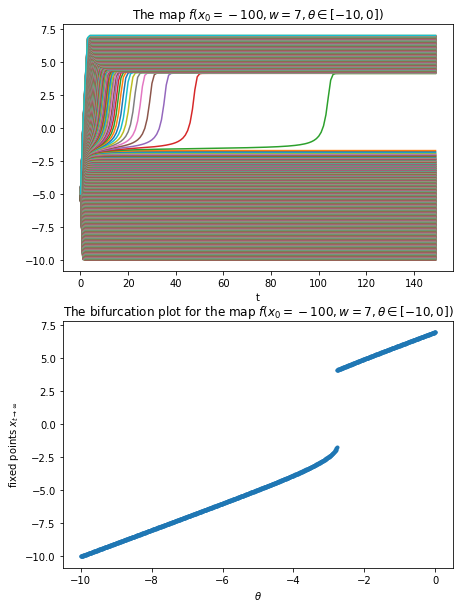

In [10]:
generate_bifurcation(-100)

We find, that the dynamical behavior of the map switches at ~2.7 where the fixed point of the system jumps from ~-2.5 to ~4.5 as can be seen in the bifurcation plot. <br>

Unfortunatly I could not find any unstable objects as was asked in the task, we can see in the map plot, that all maps converge to a fixed point, no matter the starting value. As I have said further up, there might be hidden dynamical behavior at higher values, which cannot be investigated with this device tho.

# Task 3
In this task we want to investigate the Ricker Map: $x_{t+1} = r x_t e^{-x_t}$

In [11]:
def generate_ricker(start, r, N = 1000):
    out = np.zeros(N)
    out[0] = start
    
    for i in range(1, N):
        out[i] = r * out[i-1] * np.exp(-out[i-1])
        
    return out

### Taks 3.1 and 3.2
Similar to task 2.1 we want to examine the dynamical behavior of this map.

Lets first explore the dynamical behaviour for a value of r that posesses one fixed point (as we will see later in the bifurcation plot):

In [12]:
r = np.exp(2)

Text(0.5, 1.0, 'Excerpt from the time series of the ricker map')

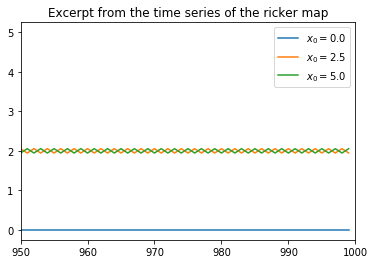

In [13]:
for x_0 in np.linspace(0, 5, 3):
    ricker_map = generate_ricker(x_0, r, N = 1000)
    plt.plot(ricker_map, label = f'$x_0 = {x_0}$')

plt.legend()
plt.xlim(950,1000)
plt.title('Excerpt from the time series of the ricker map')

Text(0.5, 1.0, 'Excerpt from the time series of the ricker map')

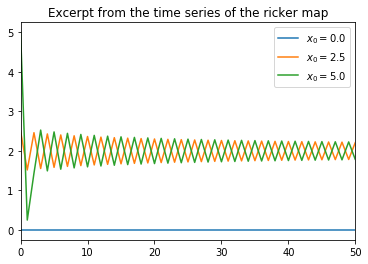

In [14]:
for x_0 in np.linspace(0, 5, 3):
    ricker_map = generate_ricker(x_0, r, N = 1000)
    plt.plot(ricker_map, label = f'$x_0 = {x_0}$')

plt.xlim(0,50)
plt.legend()
plt.title('Excerpt from the time series of the ricker map')

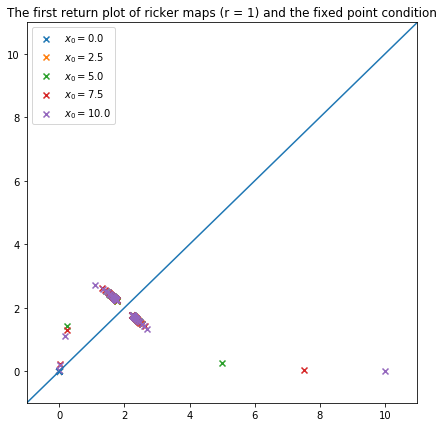

In [15]:
plt.figure(figsize = (7,7))
plt.title('The first return plot of ricker maps (r = 1) and the fixed point condition')

for x_0 in np.linspace(0,10,5):
    ricker_map = generate_ricker(x_0, r, N = 50)
    plt.scatter(ricker_map[:-1], ricker_map[1:], marker='x', label = f'$x_0 = {x_0}$')

plt.plot(np.linspace(-1000, 1000, 10), np.linspace(-1000, 1000, 10))

plt.xlim(-1, 11)
plt.ylim(-1, 11)

plt.legend()

We find (again within the range we can cover with this device) severeal fixed points for $r = e^2$.
The two fixed points are at 0 and 2, both appear to be stable as the maps converge towards both of them for different starting values.

An important note is: For negative starting values the ricker map diverges, as can easily be seen from the definition

Next we want to explore the dynamical behavior for different values of r.

In [16]:
rs = np.linspace(np.exp(1), np.exp(4), 1000)

Text(0.5, 0, 't')

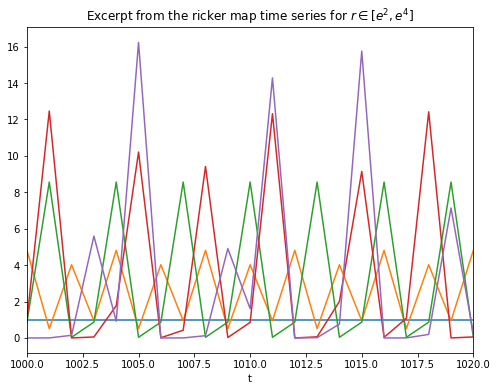

In [17]:
plt.figure(figsize = (8,6))

for r in rs[::200]:
    map_ricker = generate_ricker(x_0, r, 5000)
    plt.plot(map_ricker)
    
plt.title(r'Excerpt from the ricker map time series for $r \in [e^2, e^4]$'.format(x_0))
plt.xlim(1000, 1020)

plt.xlabel('t')

What we find is that the dynamical behavior of the ricker map is drastically different for different values of r. <br>
For $r = e^2$ for example the map has a single stable fix point, while it oscillates between the two or more fixed points for larger r. <br>
As we will see next, for some r it does not appear to oscillate and rather displayes a chaotic behavior within a certain interval.

In [18]:
def generate_bifurcation(x_0):
    plt.figure(figsize = (8,6))
    
    limit = []

    for r in rs:
        map_ricker = generate_ricker(x_0, r, 10000)
        limit.append(map_ricker[-100:])
    
    for r, lim in zip(rs, limit):
        plt.scatter([r,] * len(lim), lim, color = 'blue', marker = '.')
    plt.title(r'The bifurcation plot for the ricker map with $x_0 = 1$'.format(x_0))
    plt.xlabel(r'r')
    plt.ylabel(r'fixed points')

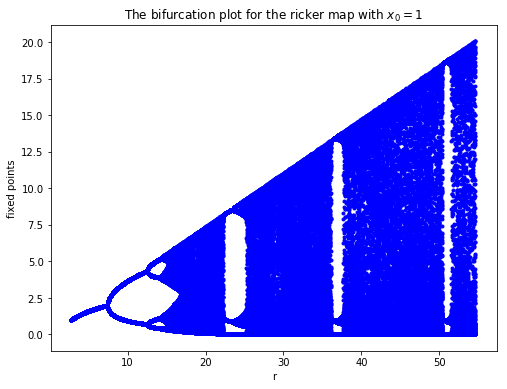

In [19]:
generate_bifurcation(1)

The bifurcation plot reveals, that the ricker map displayes a very complex dynamical behavior for different values of r. <br>
There are regions in $\mathbb{R}_+$ that display simple behavior, like convergence to a single fixed point or oscillation between several fixed point, other regions however seem to be totally chaotic. <br>
The switching between these regions does not really appear to follow any paticular rule, only that there seems to be a trend where fixed points split towards larger r only to descent into chaos which then again spawns stable points with a low number of fixed points.